데이터 처리 
1. EDA
2. 학습
3. 훈련 : 데이터의 80% 이용
4. 평가 : 데이터의 20% 이용

당뇨병 데이터 분석

목적 : 정확한 당뇨 관련 데이터를 통해 환자가 당뇨에 걸렸는가를 예측 가능하게 하기 위함 (Pima Indian의 여성, 21살 이상)

목표 : 결측치나 이상치를 잘 처리해서 현재 가진 데이터들의 의미를 높일 것

데이터 컬럼 설명

    1. Pregnancies : 임신 횟수
    2. Glucose : 포도당 부하 검사 수치
    3. BloodPressure : 혈압
    4. SkinThinkness : 팔 삼두근 뒤쪽의 피하지방 측정값
    5. Insulin : 혈청 인슐린
    6. BMI : 체질량 지수
    7. DiabetesPedigreeFunction : 당뇨 내력 가중치 값
    8. Age : 나이
    9. Outcome : 클래스 결정 값(0 또는 1)

당뇨병 : 인슐린의 분비량이 부족하거나 정상적인 기능이 이루어지지 않는 등의 대사 질환의 일종, 혈중 포도당의 농도가 높아지는 고혈당을 특징으로 함.

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [219]:
data = pd.read_csv('../data/diabetes.csv');
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [221]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


결측치 관리 

    
    임신 횟수는 0일수도 있기 때문에 결측치 처리 X, Outcome도 마찬가지

    그 외의 수치는 0보다 커야 하기 때문에 0이거나 0보다 작으면 결측치로 처리 



In [222]:
data_nan = data.iloc[:, 1:8]
data_nan

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [223]:
data_nan = data_nan[data_nan > 0]
data_nan

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,183.0,64.0,NaN,NaN,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63
764,122.0,70.0,27.0,NaN,36.8,0.340,27
765,121.0,72.0,23.0,112.0,26.2,0.245,30
766,126.0,60.0,NaN,NaN,30.1,0.349,47


In [224]:
#상관계수 확인
data_corr = data_nan.corr()
data_corr

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Glucose,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136
BloodPressure,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107
SkinThickness,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816
Insulin,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261
BMI,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841
DiabetesPedigreeFunction,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561
Age,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000


In [225]:
df = data_nan.iloc[:,3]
df2 = df.dropna(how="any");
df2


3       94.0
4      168.0
6       88.0
8      543.0
13     846.0
       ...  
753    510.0
755    110.0
760     16.0
763    180.0
765    112.0
Name: Insulin, Length: 394, dtype: float64

    Glucose : 결측치 4개
    BloodPressure : 결측치 35개
    SkinThickness : 결측치 227개
    Insulin : 결측치 374개
    BMI : 결측치 11개
    DiabetesPedigreeFunction : 결측치 0개
    Age : 결측치 0개

SkinThickness, Insulin가 포함된 것은 따로 관리

그 외는 drop해 놓고 따로 확인만 해보면 될 듯. -> 나이가 엄청 많거나, 임신 횟수가 많은 등등 이상치가 있을 수도 있음.

In [226]:
# 2개의 요소를 제외한 데이터프레임 만듦.
df = data.T
piece = [df[0:3], df[5:]]
data1 = pd.concat(piece).T
data1

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0


In [227]:
# data1 (결측치가 별로 없는 요소들) 결측치 제거
df = data1.T
df1 = df[1:6]
data1_nan = df1[df1> 0]
piece = [df[0:1], data1_nan, df[6:7]]
data1_nan1 = pd.concat(piece).T
df2 = data.T[3:4].T #SkinThinkness
df3 = data.T[4:5].T #Insulin
data1_nan2 = df2[df2 > 0] #SkinThinkness의 결측치 Nan인 상태
data1_nan3 = df3[df3>0] #Insulin의 결측치 Nan인 상태

인슐린 결측치를 채우기 위해 다른 요소들과 상관 관계를 찾아 볼 것.

In [228]:
piece = [data1_nan1, data1_nan3]
df3 = pd.concat(piece, axis=1) #Insulin 결측치 Nan인 상태 + skinthinkness 외의 다른 요소들
data1_nan_rm = df3.dropna(how="any")
data1_nan_rm

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,94.0
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,168.0
6,3.0,78.0,50.0,31.0,0.248,26.0,1.0,88.0
8,2.0,197.0,70.0,30.5,0.158,53.0,1.0,543.0
13,1.0,189.0,60.0,30.1,0.398,59.0,1.0,846.0
...,...,...,...,...,...,...,...,...
753,0.0,181.0,88.0,43.3,0.222,26.0,1.0,510.0
755,1.0,128.0,88.0,36.5,1.057,37.0,1.0,110.0
760,2.0,88.0,58.0,28.4,0.766,22.0,0.0,16.0
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,180.0


<Axes: xlabel='Glucose', ylabel='Insulin'>

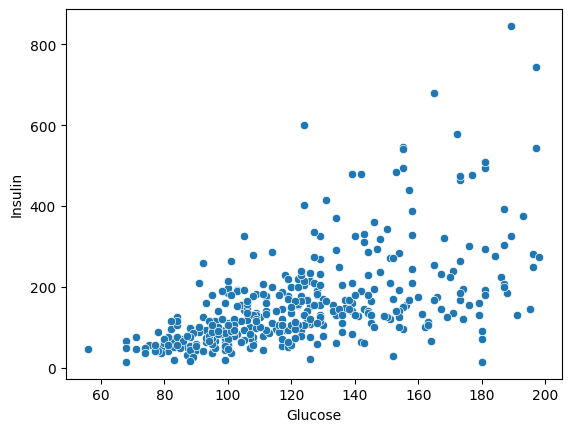

In [229]:
piece = [data1_nan_rm['Glucose'], data1_nan_rm["Insulin"]]
data_diff = pd.concat(piece, axis=1)
sns.scatterplot(x="Glucose", y="Insulin", data=data_diff)

1. Glucose

    데이터를 보면 glucose가 140이하 일때는 거의 모든 인슐린 수치가 200이 넘어가지 않음. 140이상 부터는 인슐린 수치가 더욱 높게 측청되는 것이 많음.
    
    -> 어느 정도 상관 관계가 있음.

<Axes: xlabel='BloodPressure', ylabel='Insulin'>

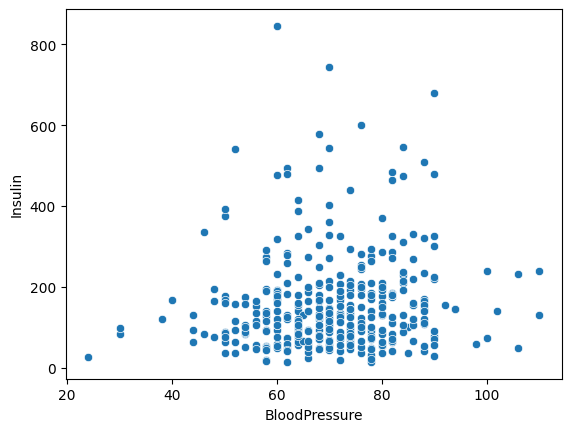

In [230]:
piece = [data1_nan_rm['BloodPressure'], data1_nan_rm["Insulin"]]
data_diff = pd.concat(piece, axis=1)
sns.scatterplot(x="BloodPressure", y="Insulin", data=data_diff)

2. BloodPressure

    인슐린이 많아짐과 상관없이 40~90사이에 거의 분포되어 있음.

    -> 별로 상관관계가 없음 (비례관계 없음)

<Axes: xlabel='BMI', ylabel='Insulin'>

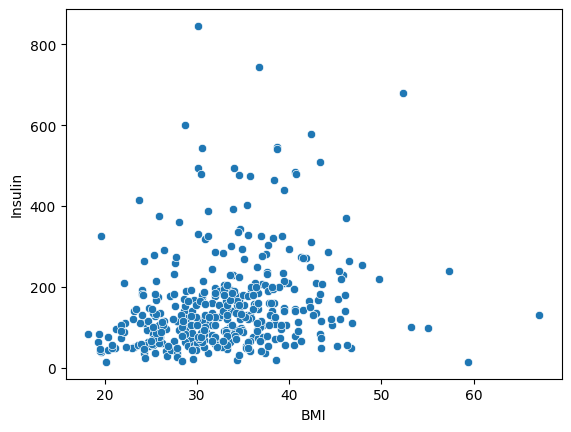

In [231]:
piece = [data1_nan_rm['BMI'], data1_nan_rm["Insulin"]]
data_diff = pd.concat(piece, axis=1)
sns.scatterplot(x="BMI", y="Insulin", data=data_diff)

3. BMI

    이것도 거의 모든 분포가 인슐린 수치에 상관없이 20~50 사이에 고르게 분포되어 있음
    
    -> 별로 상관관계가 없음. (비례 관계 없음)

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Insulin'>

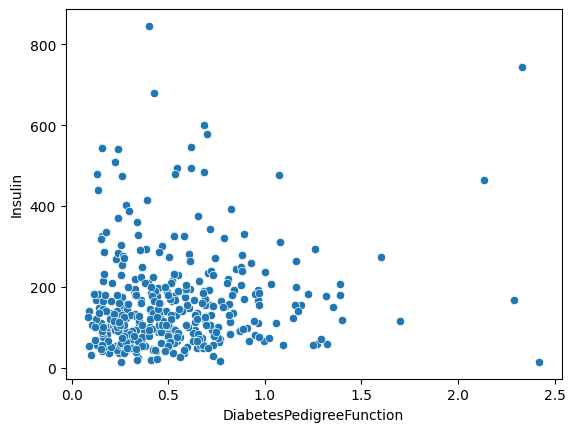

In [232]:
piece = [data1_nan_rm['DiabetesPedigreeFunction'], data1_nan_rm["Insulin"]]
data_diff = pd.concat(piece, axis=1)
sns.scatterplot(x="DiabetesPedigreeFunction", y="Insulin", data=data_diff)

4. DiabetesPedigreeFunction

    이것도 마찬가지로 인슐린 수치와 별로 상관 없음.

<Axes: xlabel='Age', ylabel='Insulin'>

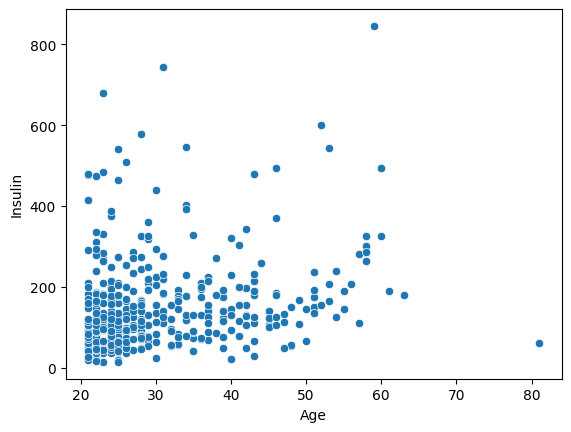

In [233]:
piece = [data1_nan_rm['Age'], data1_nan_rm["Insulin"]]
data_diff = pd.concat(piece, axis=1)
sns.scatterplot(x="Age", y="Insulin", data=data_diff)

5. Age

    이것 역시 별로 상관 없음.

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

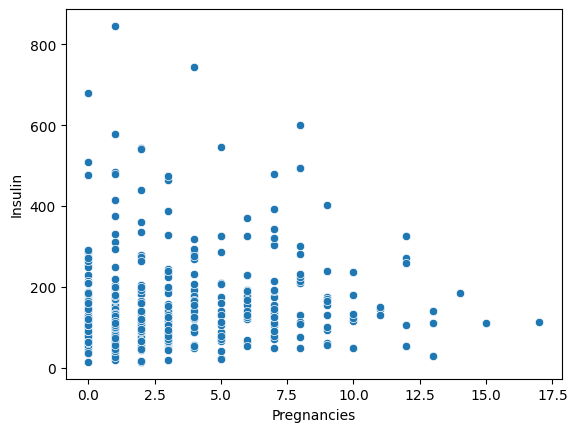

In [234]:
piece = [data1_nan_rm['Pregnancies'], data1_nan_rm["Insulin"]]
data_diff = pd.concat(piece, axis=1)
sns.scatterplot(x="Pregnancies", y="Insulin", data=data_diff)

6. Pregnancies

    이것도 별로 상관 없음.

가장 관계성이 뚜렷한 것 : Glucose

결측치 채울 때 

Glucose 0 ~ 140 >> Insulin = 100

Glucose 140 ~ 160 >> Insulin = 150

Glucose 160 이상 >> Insulin = 200

In [235]:
df3

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,NaN
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,NaN
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0,NaN
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,94.0
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,168.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,180.0
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,NaN
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,112.0
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0,NaN


In [236]:
def change_insulin(glucose, insulin):
    if 0 <= glucose <= 140 and pd.isna(insulin):
        return 100
    elif 140 < glucose <= 160 and pd.isna(insulin):
        return 150
    elif glucose > 160 and pd.isna(insulin):
        return 200
    else:
        return insulin

# apply 함수와 lambda 함수를 사용하여 Insulin 값을 변경
# Insulin 결측치 처리
df3['Insulin'] = df3.apply(lambda row: change_insulin(row['Glucose'], row['Insulin']), axis=1)
df3


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,150.0
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,100.0
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0,200.0
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,94.0
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,168.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,180.0
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,100.0
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,112.0
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0,100.0


위의 분석과 상관관계 표를 보면 상관관계 지수가 매우 정확하다는 것을 알 수 있다. 

따라서 skinthickness는 상관관계 표에 따라 BMI 지수와의 관계성만 파악하겠다.

In [237]:
piece = [data1_nan1, data1_nan2]
df4 = pd.concat(piece, axis=1) #SkinThickness 결측치 Nan인 상태 + Insulin 외의 다른 요소들
data1_nan_rm2 = df4.dropna(how="any")
data1_nan_rm2

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,35.0
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,29.0
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,23.0
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,35.0
6,3.0,78.0,50.0,31.0,0.248,26.0,1.0,32.0
...,...,...,...,...,...,...,...,...
761,9.0,170.0,74.0,44.0,0.403,43.0,1.0,31.0
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,48.0
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,27.0
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,23.0


<Axes: xlabel='BMI', ylabel='SkinThickness'>

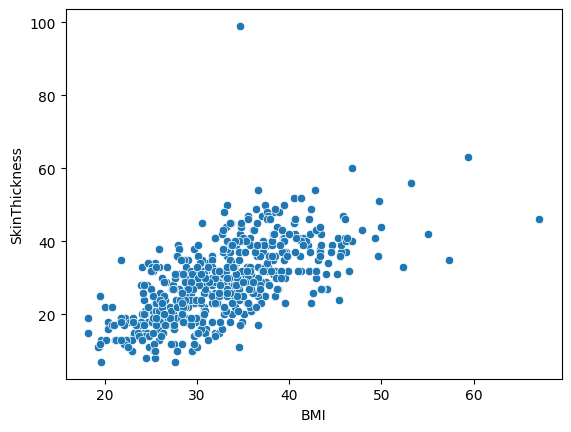

In [238]:
piece = [data1_nan_rm2['BMI'], data1_nan_rm2["SkinThickness"]]
data_diff2 = pd.concat(piece, axis=1)
sns.scatterplot(x="BMI", y="SkinThickness", data=data_diff2)

비례 관계에 따라 
    BMI : 0~30 -> SkinThickness : 15
        : 30~40 -> SkinThickness : 30
        : 40이상 -> SkinThickness : 40

In [239]:
def change_SkinThickness(BMI, SkinThickness):
    if 0 <= BMI <= 30 and pd.isna(SkinThickness):
        return 15
    elif 30 < BMI <= 40 and pd.isna(SkinThickness):
        return 30
    elif BMI > 40 and pd.isna(SkinThickness):
        return 40
    else:
        return SkinThickness

# apply 함수와 lambda 함수를 사용하여 Insulin 값을 변경
# Insulin 결측치 처리
df4['SkinThickness'] = df4.apply(lambda row: change_SkinThickness(row['BMI'], row['SkinThickness']), axis=1)
df4

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,35.0
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,29.0
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0,15.0
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,23.0
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,35.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,48.0
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,27.0
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,23.0
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0,30.0


In [240]:
#합치기 
piece = [df3, df4['SkinThickness']]
data_process_msv = pd.concat(piece, axis=1)
data_process_msv = data_process_msv.dropna(how='any')
data_process_msv

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin,SkinThickness
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0,150.0,35.0
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0,100.0,29.0
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0,200.0,15.0
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0,94.0,23.0
4,0.0,137.0,40.0,43.1,2.288,33.0,1.0,168.0,35.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0,180.0,48.0
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0,100.0,27.0
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0,112.0,23.0
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0,100.0,30.0


DiabetesPedigreeFunction, Outcome를 제외한 feature들에 Robust Scaling을 하겠다.

In [241]:
# add the new created feature
from sklearn.preprocessing import RobustScaler

rs = RobustScaler().fit(data_process_msv[['Insulin']]) #Robust scaling
data_process_msv_copy = data_process_msv.copy(deep=True)
data_process_msv_copy['Insulin'] = rs.transform(data_process_msv[['Insulin']])

rs = RobustScaler().fit(data_process_msv[['Pregnancies']])
data_process_msv_copy['Pregnancies'] = rs.transform(data_process_msv[['Pregnancies']])

rs = RobustScaler().fit(data_process_msv[['Glucose']]) 
data_process_msv_copy['Glucose'] = rs.transform(data_process_msv[['Glucose']])

rs = RobustScaler().fit(data_process_msv[['BloodPressure']]) 
data_process_msv_copy['BloodPressure'] = rs.transform(data_process_msv[['BloodPressure']])

rs = RobustScaler().fit(data_process_msv[['BMI']]) 
data_process_msv_copy['BMI'] = rs.transform(data_process_msv[['BMI']])

rs = RobustScaler().fit(data_process_msv[['Age']]) 
data_process_msv_copy['Age'] = rs.transform(data_process_msv[['Age']])

rs = RobustScaler().fit(data_process_msv[['SkinThickness']]) 
data_process_msv_copy['SkinThickness'] = rs.transform(data_process_msv[['SkinThickness']])

data_process_msv_copy.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin,SkinThickness
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,0.173204,0.115564,0.025035,0.007377,0.474765,0.255931,0.343923,0.635337,-0.138122
std,0.672561,0.727811,0.773742,0.757026,0.332315,0.692082,0.475344,1.510383,0.689254
min,-0.600000,-1.727811,-3.000000,-1.560440,0.078000,-0.470588,0.000000,-1.404082,-1.533333
25%,-0.400000,-0.408284,-0.500000,-0.538462,0.245000,-0.294118,0.000000,0.000000,-0.733333
50%,0.000000,0.000000,0.000000,0.000000,0.379000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.591716,0.500000,0.461538,0.627500,0.705882,1.000000,1.000000,0.266667
max,2.800000,1.940828,3.125000,3.813187,2.420000,3.058824,1.000000,12.179592,4.600000


In [242]:
# 표를 조금 더 보기 쉽게
df5 = data1_nan1.copy(deep=True)
data2 = df5.iloc[:, :6].dropna(how='any')
data2['Pregnancies'] = data_process_msv_copy['Pregnancies']
data2['Glucose'] = data_process_msv_copy['Glucose']
data2['BloodPressure'] = data_process_msv_copy['BloodPressure']
data2['BMI'] = data_process_msv_copy['BMI']
data2['Age'] = data_process_msv_copy['Age']
data2['Insulin'] = data_process_msv_copy['Insulin']
data2['SkinThickness'] = data_process_msv_copy['SkinThickness']
data2['Outcome'] = data_process_msv_copy['Outcome']

# Scaling까지 한 최종데이터
data_process_msosv = data2
data_process_msosv.dropna(how='any')
data_process_msosv

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Insulin,SkinThickness,Outcome
0,0.6,0.733728,0.000,0.131868,0.627,1.235294,0.816327,0.333333,1.0
1,-0.4,-0.757396,-0.375,-0.637363,0.351,0.117647,0.000000,-0.066667,0.0
2,1.0,1.562130,-0.500,-1.000000,0.672,0.176471,1.632653,-1.000000,1.0
3,-0.4,-0.662722,-0.375,-0.472527,0.167,-0.470588,-0.097959,-0.466667,0.0
4,-0.6,0.473373,-2.000,1.175824,2.288,0.235294,1.110204,0.333333,1.0
...,...,...,...,...,...,...,...,...,...
763,1.4,-0.378698,0.250,0.054945,0.171,2.000000,1.306122,1.200000,0.0
764,-0.2,0.118343,-0.125,0.483516,0.340,-0.117647,0.000000,-0.200000,0.0
765,0.4,0.094675,0.000,-0.681319,0.245,0.058824,0.195918,-0.466667,0.0
766,-0.4,0.213018,-0.750,-0.252747,0.349,1.058824,0.000000,0.000000,1.0


In [243]:
data_process_msosv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    float64
 1   Glucose                   724 non-null    float64
 2   BloodPressure             724 non-null    float64
 3   BMI                       724 non-null    float64
 4   DiabetesPedigreeFunction  724 non-null    float64
 5   Age                       724 non-null    float64
 6   Insulin                   724 non-null    float64
 7   SkinThickness             724 non-null    float64
 8   Outcome                   724 non-null    float64
dtypes: float64(9)
memory usage: 56.6 KB


In [244]:
data_process_msosv.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Insulin,SkinThickness,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,0.173204,0.115564,0.025035,0.007377,0.474765,0.255931,0.635337,-0.138122,0.343923
std,0.672561,0.727811,0.773742,0.757026,0.332315,0.692082,1.510383,0.689254,0.475344
min,-0.600000,-1.727811,-3.000000,-1.560440,0.078000,-0.470588,-1.404082,-1.533333,0.000000
25%,-0.400000,-0.408284,-0.500000,-0.538462,0.245000,-0.294118,0.000000,-0.733333,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.379000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.591716,0.500000,0.461538,0.627500,0.705882,1.000000,0.266667,1.000000
max,2.800000,1.940828,3.125000,3.813187,2.420000,3.058824,12.179592,4.600000,1.000000
